In [1]:
import pandas as pd
import numpy as  np
from IPython.display import Image
import dot2tex as d2t
import subprocess
import re

import event_tree_class as tree
import tree2tex as t2t

In [17]:
import pandas as pd
import numpy as np
import event_tree_class as tree
import tree2tex as t2t
from IPython.display import Image

# Frequency Model

In [3]:
df = pd.read_csv("../data/processed/freq_mod.csv", index_col=0)
df.head()

,age_group,sex,freq,acc_inv,hp
1,"(18,21]",M,2,0,0.0
2,"(21,80]",F,1,0,0.0
3,"(21,80]",M,1,0,0.0
4,"(21,80]",F,1,0,0.0
5,"(21,80]",F,3,0,0.0


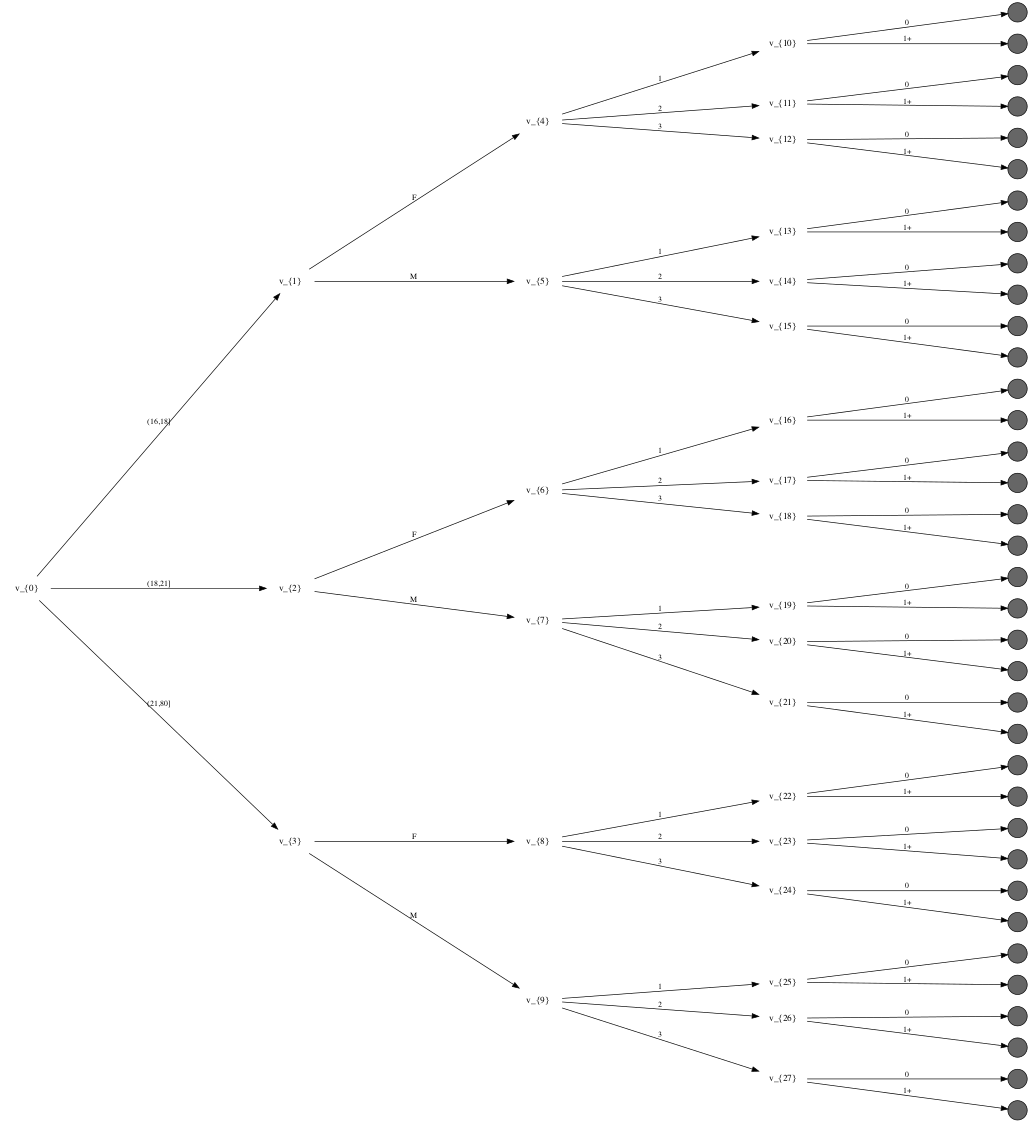

In [4]:
order = ["age_group", "sex", "freq", "acc_inv"]
mod_freq = tree.ceg({'dataframe' : df[order]})
new_nodes = ["v_{" + str(n) + "}" for n in list(range(0, len(mod_freq.nodes)))]
mod_freq.rename_nodes(new_nodes)
mod_freq.AHC_transitions(alpha = 3)

mod_freq_tree = mod_freq.event_tree_figure(
    "../figures/tree", 
    params={'ranksep': 4.0, 'fontsize': 12, 'shape': "none", 'width': 1}, 
    display_counts=False, 
    return_raw=True
)
converter = t2t.converter({
  'figure': mod_freq_tree,
  'labelled_nodes' : {0: "Age", 3: "Sex", 9: "Frequency", 27: "Accident"},
  'filename': "freq_event_tree"
})

converter.export_processed()
Image(mod_freq_tree.create_png())

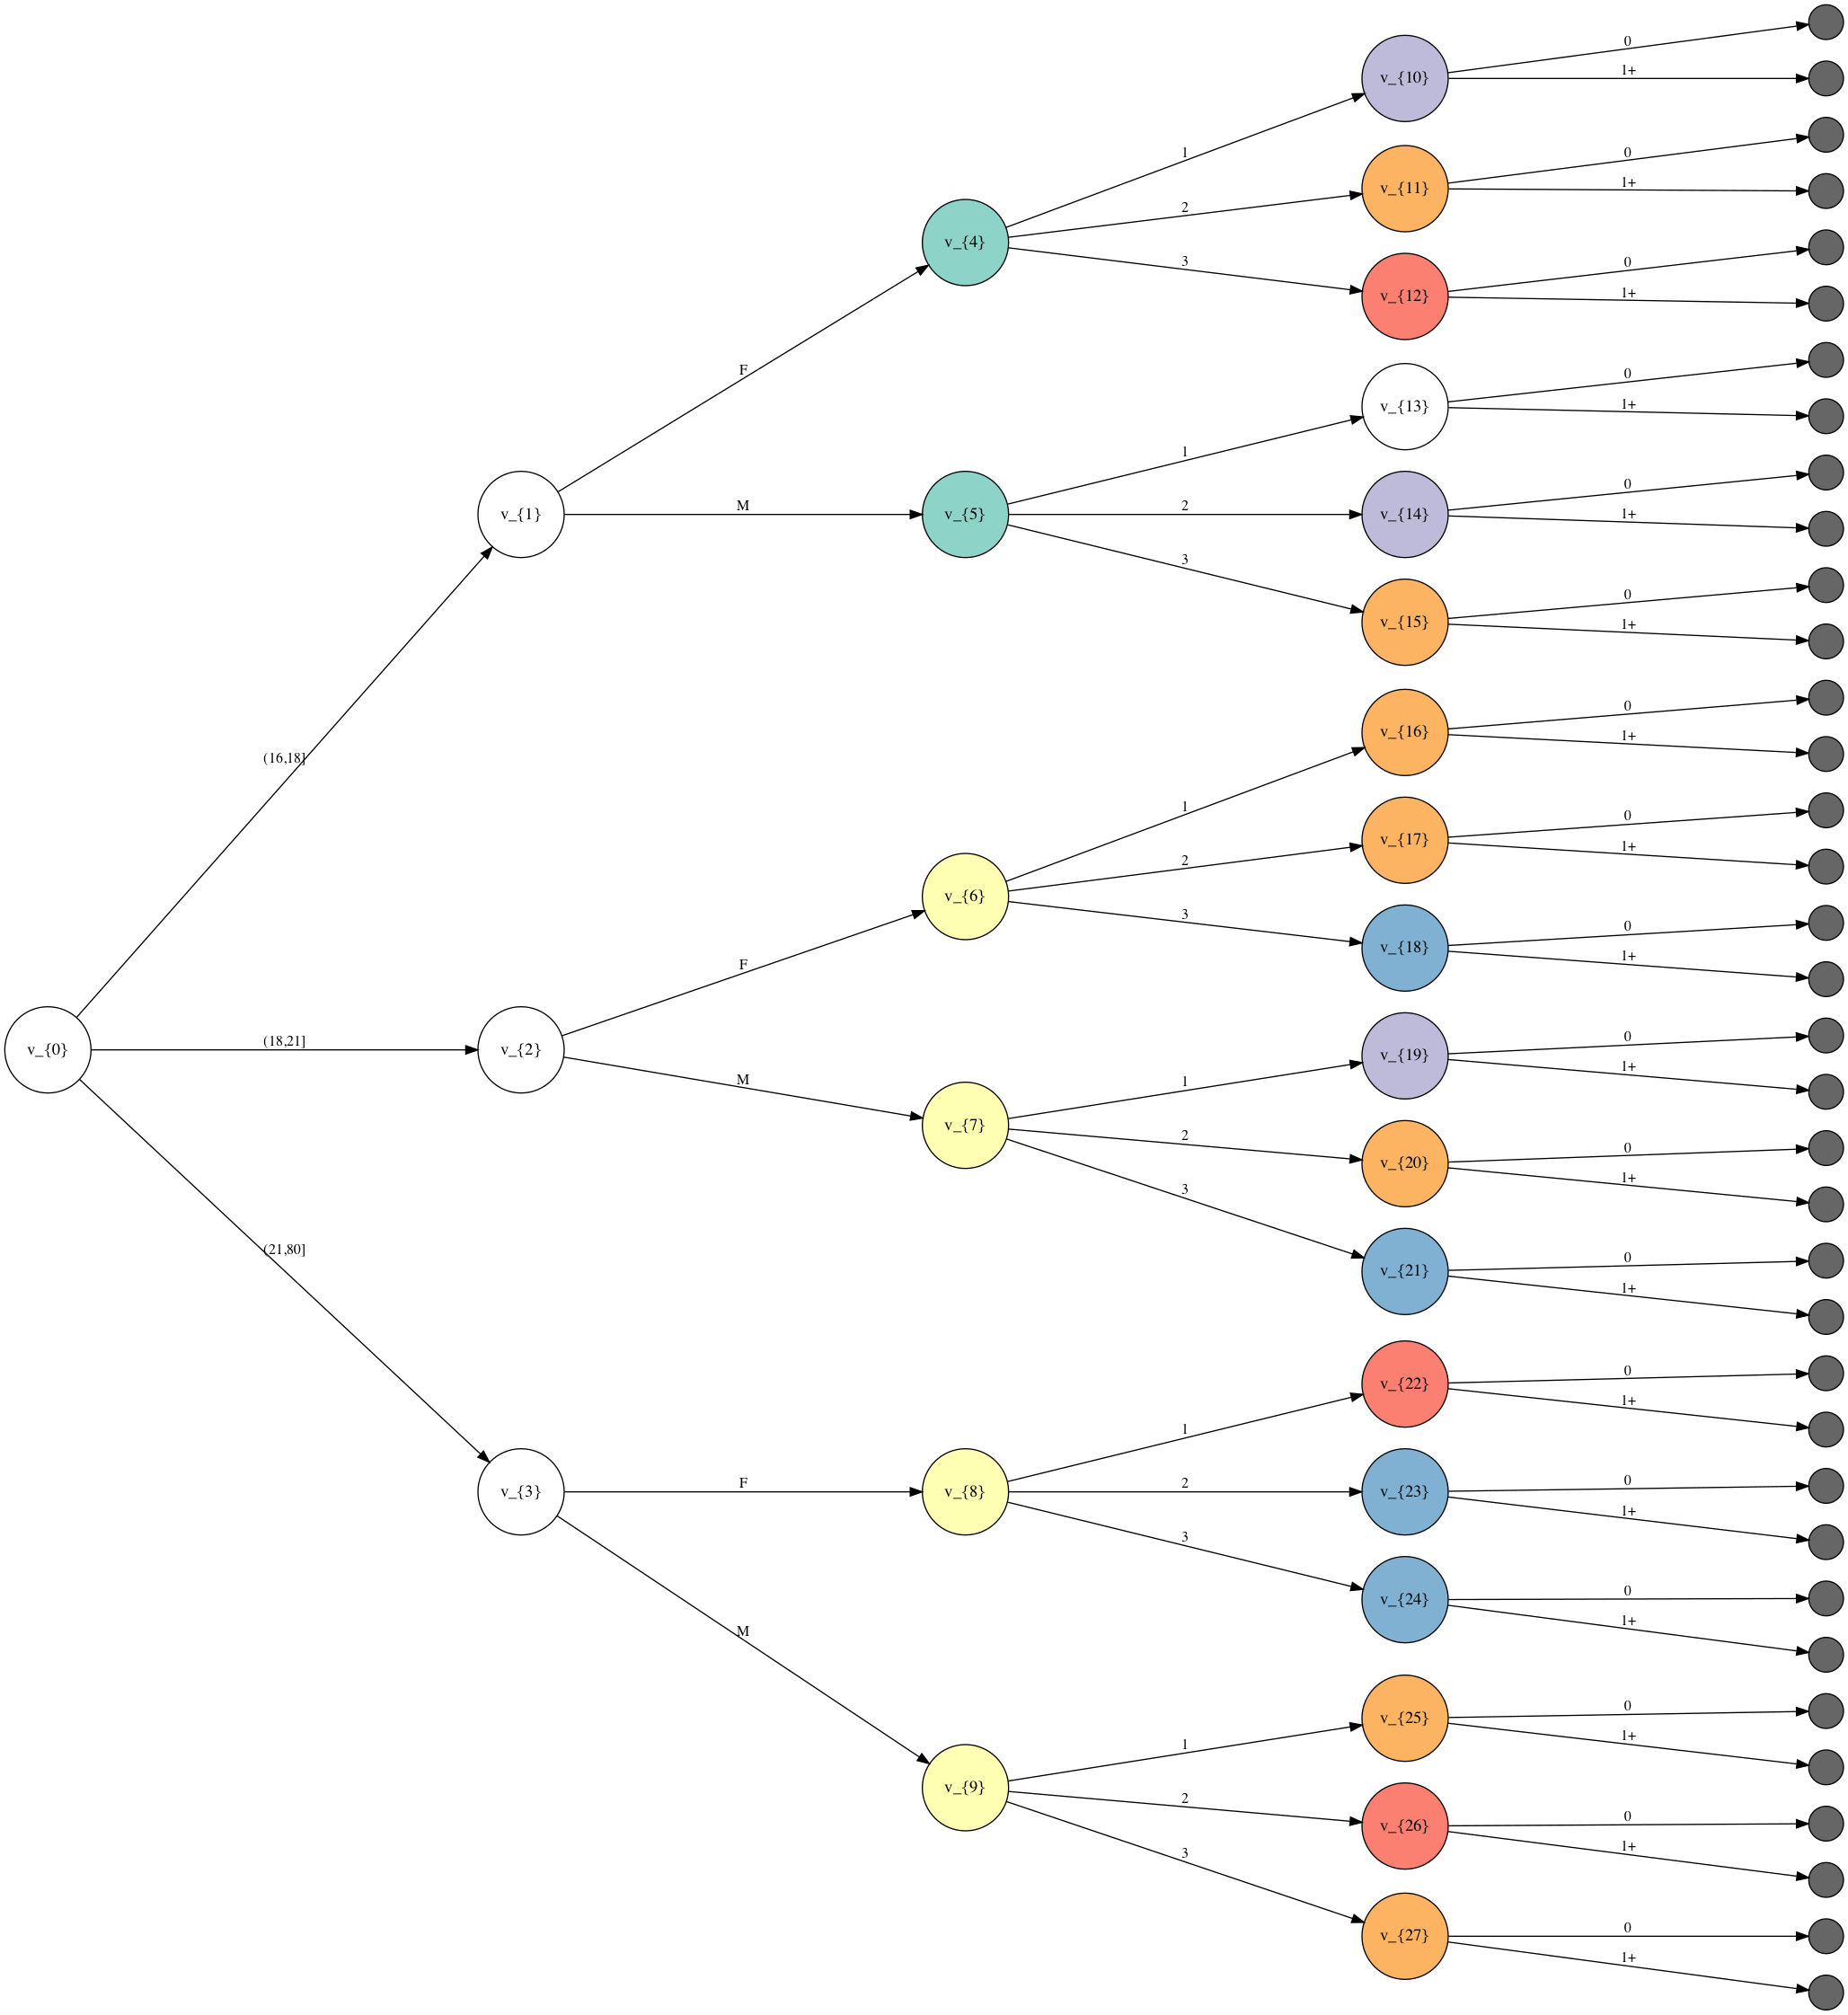

In [5]:
mod_freq_staged_tree = mod_freq.staged_tree_figure(
    "../figures/tree", 
    params={'ranksep': 4, 'fontsize': 12, 'shape': "circle", 'width': 1, 'style': "filled"}, 
    display_counts=False,
    return_raw=True
)
converter = t2t.converter({
  'figure': mod_freq_staged_tree,
  'labelled_nodes' : {0: "Age", 3: "Sex", 9: "Frequency", 27: "Accident"},
  'filename': "freq_staged_tree"
})
converter.export_processed()
Image(mod_freq_staged_tree.create_png())

In [26]:
mod_freq_ceg = mod_freq.ceg_figure_optimal(
    "ceg",  
    display_probs=False, 
    return_raw=True,
    params = {'ranksep': 2, 'fontsize': 15, 'shape': "circle", 'width': 0.6, 'style': "filled"},
)
converter = t2t.converter({
  'figure': mod_freq_ceg,
  'labelled_nodes' : {0: "Age", 3: "Sex", 8: "Frequency", 23: "Accident"},
  'filename': "freq_ceg"
})
converter.export_processed()
Image(mod_freq_ceg.create_png())

# Mileage model - missing miles

In [20]:
df = pd.read_csv("../data/processed/miles_mod.csv", index_col=0)
df.head()

,age_group,sex,miles,acc_inv
1,"(18,21]",M,3.0,0
2,"(21,80]",F,3.0,0
3,"(21,80]",M,3.0,0
4,"(21,80]",F,2.0,0
5,"(21,80]",F,3.0,0


In [21]:
df["miles"].isna().sum()
df.count()

age_group    9553
sex          9553
miles        8791
acc_inv      9491
dtype: int64

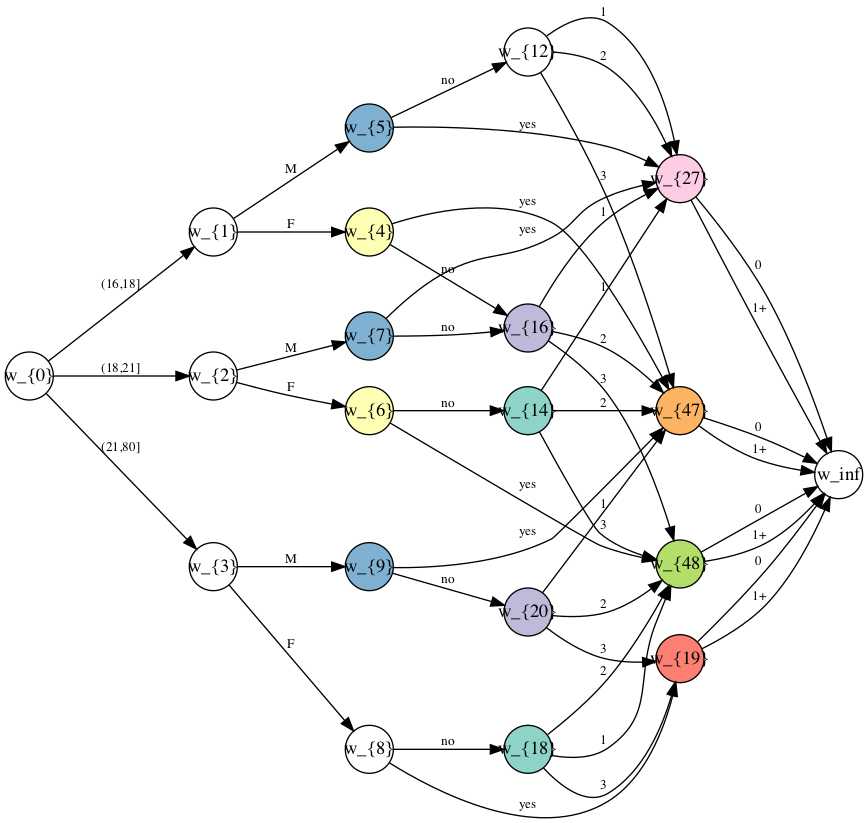

In [25]:
order = ["age_group", "sex", "is_missing", "miles", "acc_inv"]
df["is_missing"] = np.where(df["miles"].isna(), "yes", "no")
df["miles"] = np.where(df["miles"].isna(), np.nan, df["miles"].astype('Int64'))
mod_miles_mis = tree.ceg({'dataframe' : df[order]})
new_nodes = ["w_{" + str(n) + "}" for n in list(range(0, len(mod_miles_mis.nodes)))]
mod_miles_mis.rename_nodes(new_nodes)
mod_miles_mis.AHC_transitions(alpha = 3)
mod_miles_mis = mod_miles_mis.ceg_figure_optimal(
    "ceg",  
    display_probs=False, 
    return_raw=True,
    params = {'ranksep': 1, 'fontsize': 15, 'shape': "circle", 'width': 0.5, 'style': "filled"},
)
converter = t2t.converter({
  'figure': mod_miles_mis,
  'labelled_nodes' : {0: "Age", 3: "Sex", 8: "Missing", 18: "Miles", 19: "Accident"},
  'filename': "ceg_miles_mis"
})
converter.export_processed()
Image(mod_miles_mis.create_png())

In [14]:
order = ["age_group", "sex", "miles", "acc_inv"]
mod_miles = tree.ceg({'dataframe' : df[order].dropna()})
new_nodes = ["w_{" + str(n) + "}" for n in list(range(0, len(mod_miles.nodes)))]
mod_miles.rename_nodes(new_nodes)
mod_miles.AHC_transitions(alpha = 3)
mod_miles_ceg = mod_miles.ceg_figure_optimal(
    "ceg", params = {'ranksep' : 2, 'fontsize': 15, 'shape': "circle", 'width': 0.5, 'style': "filled"}, 
    display_probs=True, 
    return_raw=True
)
export_to_tex(mod_miles_ceg, "miles_complete_ceg")
#Image(mod_miles_ceg.create_png())

NameError: name 'export_to_tex' is not defined

In [9]:
order = ["age_group", "sex", "is_missing", "miles", "acc_inv"]
df["is_missing"] = np.where(df["miles"].isna(), "yes", "no")
df["miles"] = np.where(df["miles"].isna(), np.nan, df["miles"].astype('Int64'))
mod_miles = tree.ceg({'dataframe' : df[order]})
new_nodes = ["w_{" + str(n) + "}" for n in list(range(0, len(mod_miles.nodes)))]
mod_miles.rename_nodes(new_nodes)
mod_miles.AHC_transitions(alpha = 3)
mod_miles_ceg = mod_miles.ceg_figure_optimal(
    "ceg", params = {'ranksep' : 1, 'fontsize': 15, 'shape': "circle", 'width': 0.5, 'style': "filled"}, 
    display_probs=True, 
    return_raw=True,
)
export_to_tex(mod_miles_ceg, "miles_missing_ceg")
#Image(mod_miles_ceg.create_png())

# Missing responses

In [14]:
df = pd.read_csv("../data/processed/new_missing_values.csv", index_col = 0)
df = df[df["sent"] == 1]
df.head()

,sex,cohort,sent,wave1,wave2,wave3,wave4
24,F,2,1,1,1,1.0,1.0
25,M,15,1,1,1,NaN,NaN
41,F,5,1,0,0,0.0,0.0
51,M,3,1,0,1,1.0,1.0
54,M,4,1,1,0,1.0,1.0


In [15]:
df.groupby("sex").sum()

,cohort,sent,wave1,wave2,wave3,wave4
sex,,,,,,
F,96574,11817,6410,4825,2792.0,1878.0
M,65477,8115,3640,2613,1394.0,880.0


In [18]:
order = ["sex", "wave1", "wave2", "wave3", "wave4"]
mod_responses = tree.ceg({'dataframe' : df[order]})
new_nodes = ["w_{" + str(n) + "}" for n in list(range(0, len(mod_responses.nodes)))]
mod_responses.rename_nodes(new_nodes)
mod_responses.AHC_transitions(alpha = 2)
mod_responses_ceg = mod_responses.ceg_figure_optimal("plot_ceg", return_raw=True)
export_to_tex(mod_responses_ceg, "responses_ceg")
#Image(mod_responses_ceg.create_png())

In [21]:
df["12"] = df["wave1"].astype(str) + df["wave2"].astype(str)
order = ["sex", "12", "wave3", "wave4"]
mod_compact_responses = tree.ceg({'dataframe' : df[order]})
new_nodes = ["w_{" + str(n) + "}" for n in list(range(0, len(mod_compact_responses.nodes)))]
mod_compact_responses.rename_nodes(new_nodes)
mod_compact_responses.AHC_transitions(alpha = 2)
mod_responses_compact_ceg = mod_responses.ceg_figure_optimal("plot_ceg", return_raw=True)
export_to_tex(mod_responses_compact_ceg, "responses_compact_ceg")
#Image(mod_responses_ceg.create_png())

# Example trees

In [3]:
df = pd.read_csv("../data/processed/base_mod.csv", index_col = 0)
df["int_age"] = df["age"].astype(int)
df.head()

,age,sex,freq,miles,acc_inv,int_age
1,17.727584,F,1,6000.0,0,17
2,17.232033,M,1,12000.0,0,17
3,18.056126,F,1,6000.0,0,18
4,19.446954,F,3,1400.0,0,19
5,17.431896,F,2,1000.0,0,17


In [27]:
order = ["sex", "int_age", "acc_inv"]
mod = tree.ceg({'dataframe' : df[df["int_age"].isin(list(range(18, 28)))][order]})
new_nodes = ["v_{" + str(n) + "}" for n in list(range(0, len(mod.nodes)))]
mod.rename_nodes(new_nodes)
mod_tree = mod.event_tree_figure(
    "../figures/tree", 
    params={
      'ranksep': 4.0, 'fontsize': 12, 
      'shape': "none", 'width': 1.5,
      'display_edge_labels': False,
      'final_node_size': 0.2}, 
    display_counts=False, 
    return_raw=True
)
converter = t2t.converter({
  'figure': mod_tree,
  'labelled_nodes' : {0: "$X_1$", 2: "$X_2$", 22: "Y"},
  'filename': "example_tree"
})
converter.export_processed()
Image(mod_tree.create_png())

In [19]:
mod = tree.ceg({'dataframe' : df[df["int_age"].isin(list(range(18, 28)))][order]})

In [20]:
len(mod.nodes)

63

In [22]:
len(new_nodes)

62